In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
dftrain = pd.read_csv('train.csv')

In [172]:
dftest  = pd.read_csv('test.csv')

In [173]:
print(dftrain.shape)
print(dftest.shape)

(1460, 81)
(1459, 80)


In [174]:
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [175]:
dftest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [176]:
dftest['SalePrice'] ='test'

In [177]:
combinedf = pd.concat([dftrain,dftest],axis=0)

In [178]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [179]:
numcols = combinedf.select_dtypes(include = np.number)
objcols = combinedf.select_dtypes(include =['object'])

In [180]:
objcols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [181]:
objcols.isnull().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
SalePrice           0
dtype: int64

In [182]:
# Missing Value or NA in these variables means - Not Available
notavailablecols = ['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu',
                    'GarageType', 'GarageFinish', 'GarageQual','GarageCond','PoolQC', 'Fence', 'MiscFeature']

In [183]:
for col in notavailablecols:
    objcols[col] = objcols[col].fillna("Not Available")

In [184]:
objcols.isnull().sum().sort_values(ascending=False)

MasVnrType       24
MSZoning          4
Utilities         2
Functional        2
SaleType          1
Electrical        1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
FireplaceQu       0
Heating           0
HeatingQC         0
CentralAir        0
GarageType        0
BsmtFinType1      0
GarageFinish      0
GarageQual        0
GarageCond        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
SaleCondition     0
BsmtFinType2      0
BsmtCond          0
BsmtExposure      0
Condition2        0
Alley             0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
BldgType          0
Street            0
HouseStyle        0
RoofStyle         0
RoofMatl          0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
SalePrice         0
dtype: int64

In [185]:
# Imputing Remaining Missing values with most_frequent

for col in objcols.columns:
    objcols[col] =  objcols[col].fillna(objcols[col].value_counts().idxmax())
    # idxmax() -  impute with index/classname of maximum frequency

In [186]:
objcols.isnull().sum().sort_values(ascending=False)

MSZoning         0
Street           0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Condition2       0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
Foundation       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
SalePrice        0
dtype: int64

In [187]:
numcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [188]:
# Seperate Categorical variables from numeric variables like rating scales, date related like year, month etc
numcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [189]:
catcols = numcols[['OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold']]

In [190]:
numcols = numcols.drop(['OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold'],axis = 1)

In [191]:
numcols.shape

(2919, 30)

In [192]:
numcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
Id                 0
WoodDeckSF         0
ScreenPorch        0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
TotRmsAbvGrd       0
PoolArea           0
Fireplaces         0
FullBath           0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
LotArea            0
MiscVal            0
dtype: int64

In [193]:
# Median imputation for numcols

for col in numcols.columns:
    numcols[col] = numcols[col].fillna(numcols[col].median())

In [194]:
numcols.describe()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.088386,10168.114080,101.396026,441.398253,49.565262,560.739979,1051.756252,1159.581706,...,0.597122,1.766701,472.877013,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968
std,842.787043,42.517628,21.317898,7886.996359,178.854579,455.534750,169.179104,439.471764,440.692234,392.362079,...,0.646129,0.761506,215.357944,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211
min,1.000000,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,730.500000,20.000000,60.000000,7478.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,...,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,...,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2189.500000,70.000000,78.000000,11570.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,...,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2919.000000,190.000000,313.000000,215245.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,4.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000


In [195]:
catcols.isnull().sum().sort_values(ascending=False)

GarageYrBlt     159
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MoSold            0
YrSold            0
dtype: int64

In [196]:
catcols.GarageYrBlt = catcols.GarageYrBlt.fillna(catcols.GarageYrBlt.value_counts().idxmax())

In [197]:
catcols.isnull().sum().sort_values(ascending=False)

OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MoSold          0
YrSold          0
dtype: int64

In [198]:
catcols['MSSubClass'] = numcols.MSSubClass

In [199]:
numcols = numcols.drop('MSSubClass',axis=1)

In [200]:
catcols.isnull().sum().sort_values(ascending=False)

OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MoSold          0
YrSold          0
MSSubClass      0
dtype: int64

In [201]:
# concat all 3 dataframes for futher EDA

combinedf_EDA = pd.concat([numcols,objcols,catcols],axis=1)

In [202]:
combinedf_EDA.shape

(2919, 81)

In [203]:
housedf_EDA = combinedf_EDA[combinedf_EDA.SalePrice != 'test']

In [204]:
housedf_EDA.shape

(1460, 81)

In [205]:
# groupby() - mean and barchart with datalabels


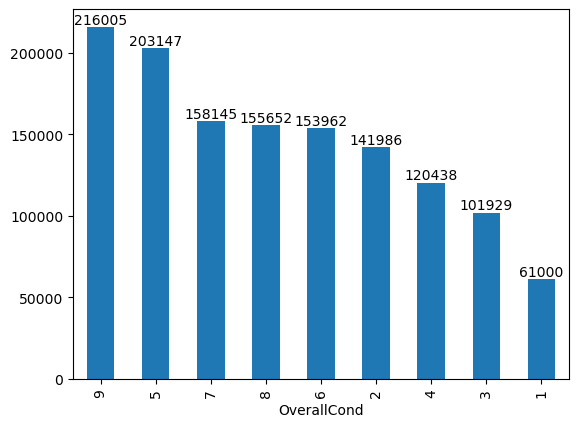

In [206]:
# salesprice and OverallCond
ax = housedf_EDA.SalePrice.groupby(housedf_EDA.OverallCond).mean().sort_values(ascending=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

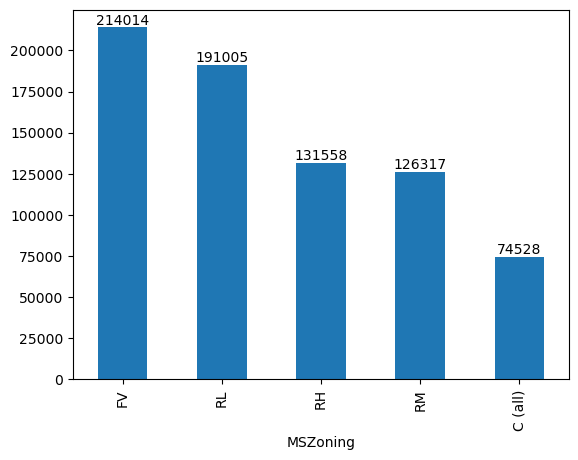

In [207]:
# SalePrice and MSZoning

ax = housedf_EDA.SalePrice.groupby(housedf_EDA.MSZoning).mean().sort_values(ascending=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

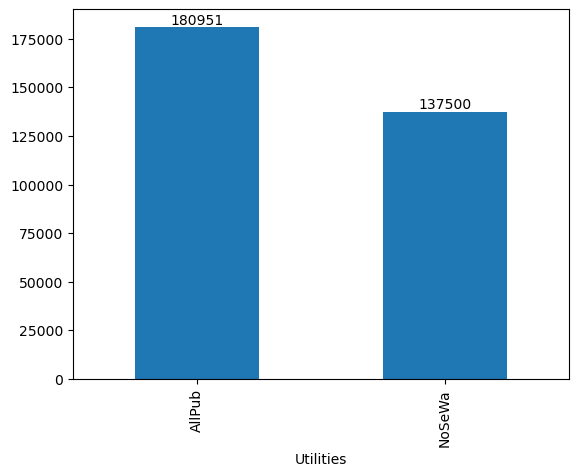

In [208]:
# SalePrice and Utilities
ax = housedf_EDA.SalePrice.groupby(housedf_EDA.Utilities).mean().sort_values(ascending=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)


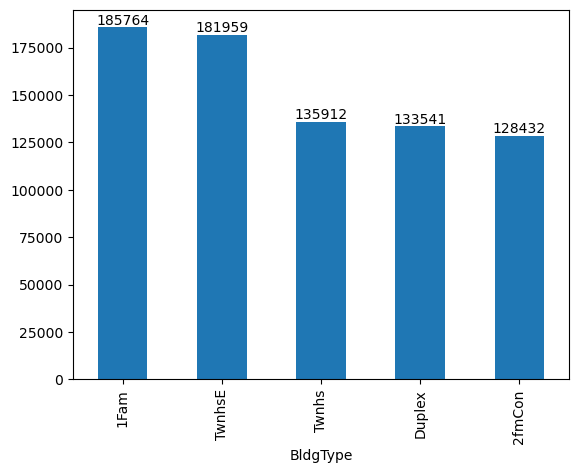

In [209]:
# SalePrice and BldgType
ax = housedf_EDA.SalePrice.groupby(housedf_EDA.BldgType).mean().sort_values(ascending=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

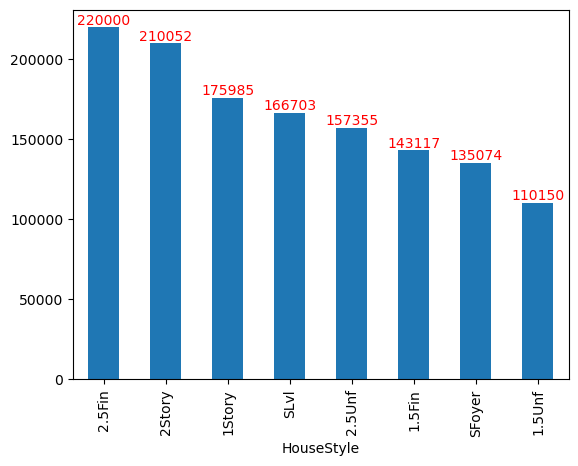

In [210]:
# Saleprice and HouseStyle
ax = housedf_EDA.SalePrice.groupby(housedf_EDA.HouseStyle).mean().sort_values(ascending=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,color='red')

In [211]:
# cross tab and Stacked Bar Plots with datalabels

<Figure size 4000x2000 with 0 Axes>

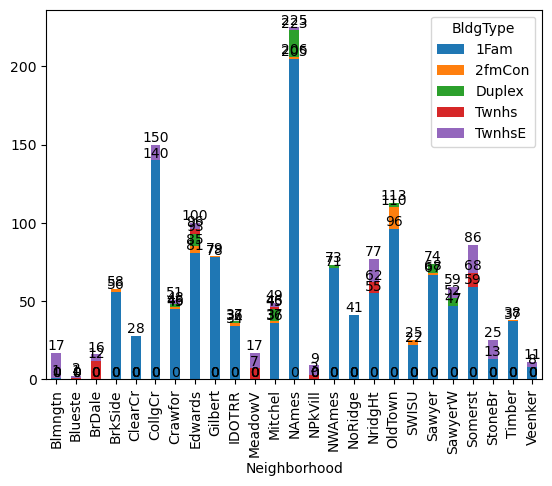

In [212]:
# Neighborhood and BldgType
plt.figure(figsize=(40,20))
ax = pd.crosstab(housedf_EDA.Neighborhood, housedf_EDA.BldgType).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

<Figure size 2000x700 with 0 Axes>

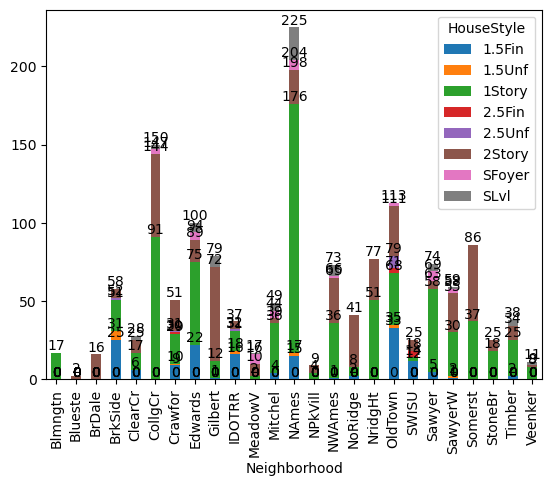

In [213]:
# Neighborhood and HouseStyle
plt.figure(figsize=(20,7))
ax = pd.crosstab(housedf_EDA.Neighborhood, housedf_EDA.HouseStyle).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

<Figure size 2000x700 with 0 Axes>

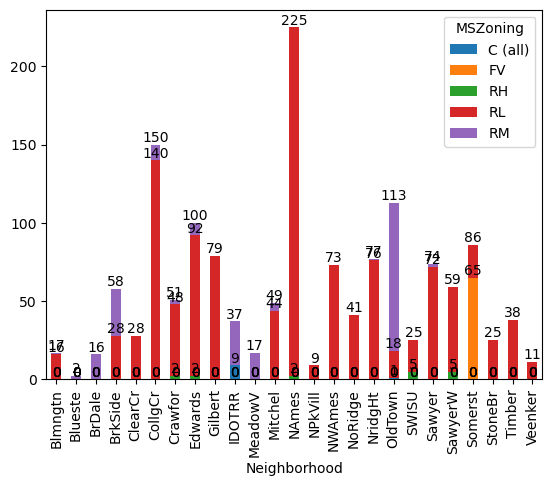

In [214]:
# Neighborhood and MS Zoning
plt.figure(figsize=(20,7))
ax = pd.crosstab(housedf_EDA.Neighborhood, housedf_EDA.MSZoning).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

In [215]:
numcols.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,...,0,2.0,548.0,0,61,0,0,0,0,0
1,2,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,...,1,2.0,460.0,298,0,0,0,0,0,0
2,3,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,...,1,2.0,608.0,0,42,0,0,0,0,0
3,4,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,...,1,3.0,642.0,0,35,272,0,0,0,0
4,5,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,...,1,3.0,836.0,192,84,0,0,0,0,0


In [216]:
# Scaling of Numcols

from sklearn.preprocessing import StandardScaler

In [217]:
#numcols = numcols.drop('Id',axis=1)

In [218]:
numcols_scaled = StandardScaler().fit_transform(numcols.drop('Id', axis = 1))

In [220]:
numcols = numcols.drop('Id',axis =1)

In [221]:
numcols_scaled = pd.DataFrame(numcols_scaled, columns = numcols.columns)

In [222]:
numcols_scaled

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-0.191815,-0.217879,0.529034,0.580959,-0.293025,-0.934782,-0.444278,-0.773861,1.207379,-0.101197,...,-0.924311,0.306418,0.348888,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592
1,0.511940,-0.072044,-0.567016,1.178162,-0.293025,-0.629818,0.477158,0.261075,-0.785025,-0.101197,...,0.623632,0.306418,-0.059804,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592
2,-0.051064,0.137197,0.338903,0.097928,-0.293025,-0.288441,-0.299027,-0.610718,1.235375,-0.101197,...,0.623632,0.306418,0.627542,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592
3,-0.426400,-0.078385,-0.567016,-0.494884,-0.293025,-0.047201,-0.671232,-0.506205,0.978742,-0.101197,...,0.623632,1.619830,0.785446,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592
4,0.699608,0.518903,1.390216,0.468984,-0.293025,-0.160994,0.211621,-0.037170,1.671651,-0.101197,...,0.623632,1.619830,1.686426,0.776967,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-2.256162,-1.043937,-0.567016,-0.969133,-0.293025,-0.033546,-1.147837,-1.564083,0.488807,-0.101197,...,-0.924311,-2.320407,-2.196149,-0.740760,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592
2915,-2.256162,-1.049263,-0.567016,-0.415842,-0.293025,-0.607060,-1.147837,-1.564083,0.488807,-0.101197,...,-0.924311,-1.006994,-0.867899,-0.740760,-0.347624,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592
2916,4.265298,1.246808,-0.567016,1.718279,-0.293025,-1.276159,0.390915,0.164209,-0.785025,-0.101197,...,0.623632,0.306418,0.478927,3.006130,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592
2917,-0.332566,0.034605,-0.567016,-0.229217,-0.293025,0.032454,-0.317183,-0.483263,-0.785025,-0.101197,...,-0.924311,-2.320407,-2.196149,-0.108374,-0.229217,-0.359601,-0.103331,-0.285935,-0.06315,1.144312


In [ ]:
# Check for Multicollinearity (no include Id)
plt.figure(figsize=(30,10))
sns.heatmap(numcols_scaled.corr(),annot=True,cmap='plasma')

In [ ]:
sns.pairplot(numcols_scaled)

In [224]:
y = objcols.SalePrice

In [225]:
objcols = objcols.drop('SalePrice',axis=1)

In [226]:
from sklearn.preprocessing import LabelEncoder

In [227]:
le = LabelEncoder()

In [228]:
objcols_en = objcols.apply(le.fit_transform)

In [229]:
objcols_en

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,1,3,3,0,4,0,10,2,...,6,1,3,3,2,3,4,1,8,4
1455,4,1,1,3,3,0,4,0,10,2,...,4,3,5,5,2,3,4,1,8,0
1456,3,1,1,3,3,0,4,0,11,2,...,5,3,5,5,2,3,4,1,8,0
1457,3,1,1,3,3,0,4,0,11,2,...,6,1,3,3,2,3,2,3,8,4


In [230]:
objcols_en = objcols_en.reset_index()

In [231]:
numcols_scaled =  numcols_scaled.reset_index()

In [232]:
y = y.reset_index()

In [233]:
combine_clean = pd.concat([numcols_scaled,objcols_en,y],axis=1)

In [234]:
combine_clean = combine_clean.drop(['index'],axis=1)

In [235]:
combine_clean.shape

(2919, 72)

In [236]:
X_train = combine_clean[combine_clean.SalePrice!='test'].drop('SalePrice',axis = 1)

In [237]:
X_test  = combine_clean[combine_clean.SalePrice=='test'].drop('SalePrice',axis = 1)

In [238]:
X_test

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1460,0.511940,0.184371,-0.567016,0.058407,0.558290,-0.661680,-0.385270,-0.671897,-0.785025,-0.101197,...,1,3,5,5,2,3,2,1,8,4
1461,0.558857,0.519791,0.036930,1.057404,-0.293025,-0.352165,0.629217,0.431865,-0.785025,-0.101197,...,1,3,5,5,2,3,4,0,8,4
1462,0.230438,0.464374,-0.567016,0.767585,-0.293025,-0.964368,-0.280871,-0.590326,0.850426,-0.101197,...,1,0,5,5,2,3,2,1,8,4
1463,0.418106,-0.024109,-0.455174,0.352617,-0.293025,-0.538784,-0.285410,-0.595424,0.796766,-0.101197,...,1,0,5,5,2,3,4,1,8,4
1464,-1.223988,-0.654748,-0.567016,-0.391691,-0.293025,1.038379,0.518010,0.306959,-0.785025,-0.101197,...,1,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-2.256162,-1.043937,-0.567016,-0.969133,-0.293025,-0.033546,-1.147837,-1.564083,0.488807,-0.101197,...,6,1,3,3,2,3,4,1,8,4
2915,-2.256162,-1.049263,-0.567016,-0.415842,-0.293025,-0.607060,-1.147837,-1.564083,0.488807,-0.101197,...,4,3,5,5,2,3,4,1,8,0
2916,4.265298,1.246808,-0.567016,1.718279,-0.293025,-1.276159,0.390915,0.164209,-0.785025,-0.101197,...,5,3,5,5,2,3,4,1,8,0
2917,-0.332566,0.034605,-0.567016,-0.229217,-0.293025,0.032454,-0.317183,-0.483263,-0.785025,-0.101197,...,6,1,3,3,2,3,2,3,8,4


In [239]:
y = y.drop('index',axis=1)

In [240]:
y =  y[y.SalePrice!='test']

In [241]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [242]:
# Decision tree regressor
# Multiple Linear Regression

In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
lr = LinearRegression()

In [245]:
model1 = lr.fit(X_train,y)

In [246]:
model1.score(X_train,y)

0.8372492247160519

In [247]:
from sklearn.model_selection import cross_val_score

In [248]:
np.mean(cross_val_score(lr,X_train,y))

-6699805135688456.0

In [249]:
model1_pred = model1.predict(X_test)

In [250]:
from sklearn.tree import DecisionTreeRegressor

In [251]:
dr = DecisionTreeRegressor(max_depth = 12)

In [252]:
model2 = dr.fit(X_train,y)

In [253]:
model2.score(X_train,y)

0.9939468803941826

In [254]:
np.mean(cross_val_score(dr,X_train,y))

0.6912530540699275

In [255]:
model2_pred = model2.predict(X_test)

In [256]:
from sklearn.tree import plot_tree,export_text

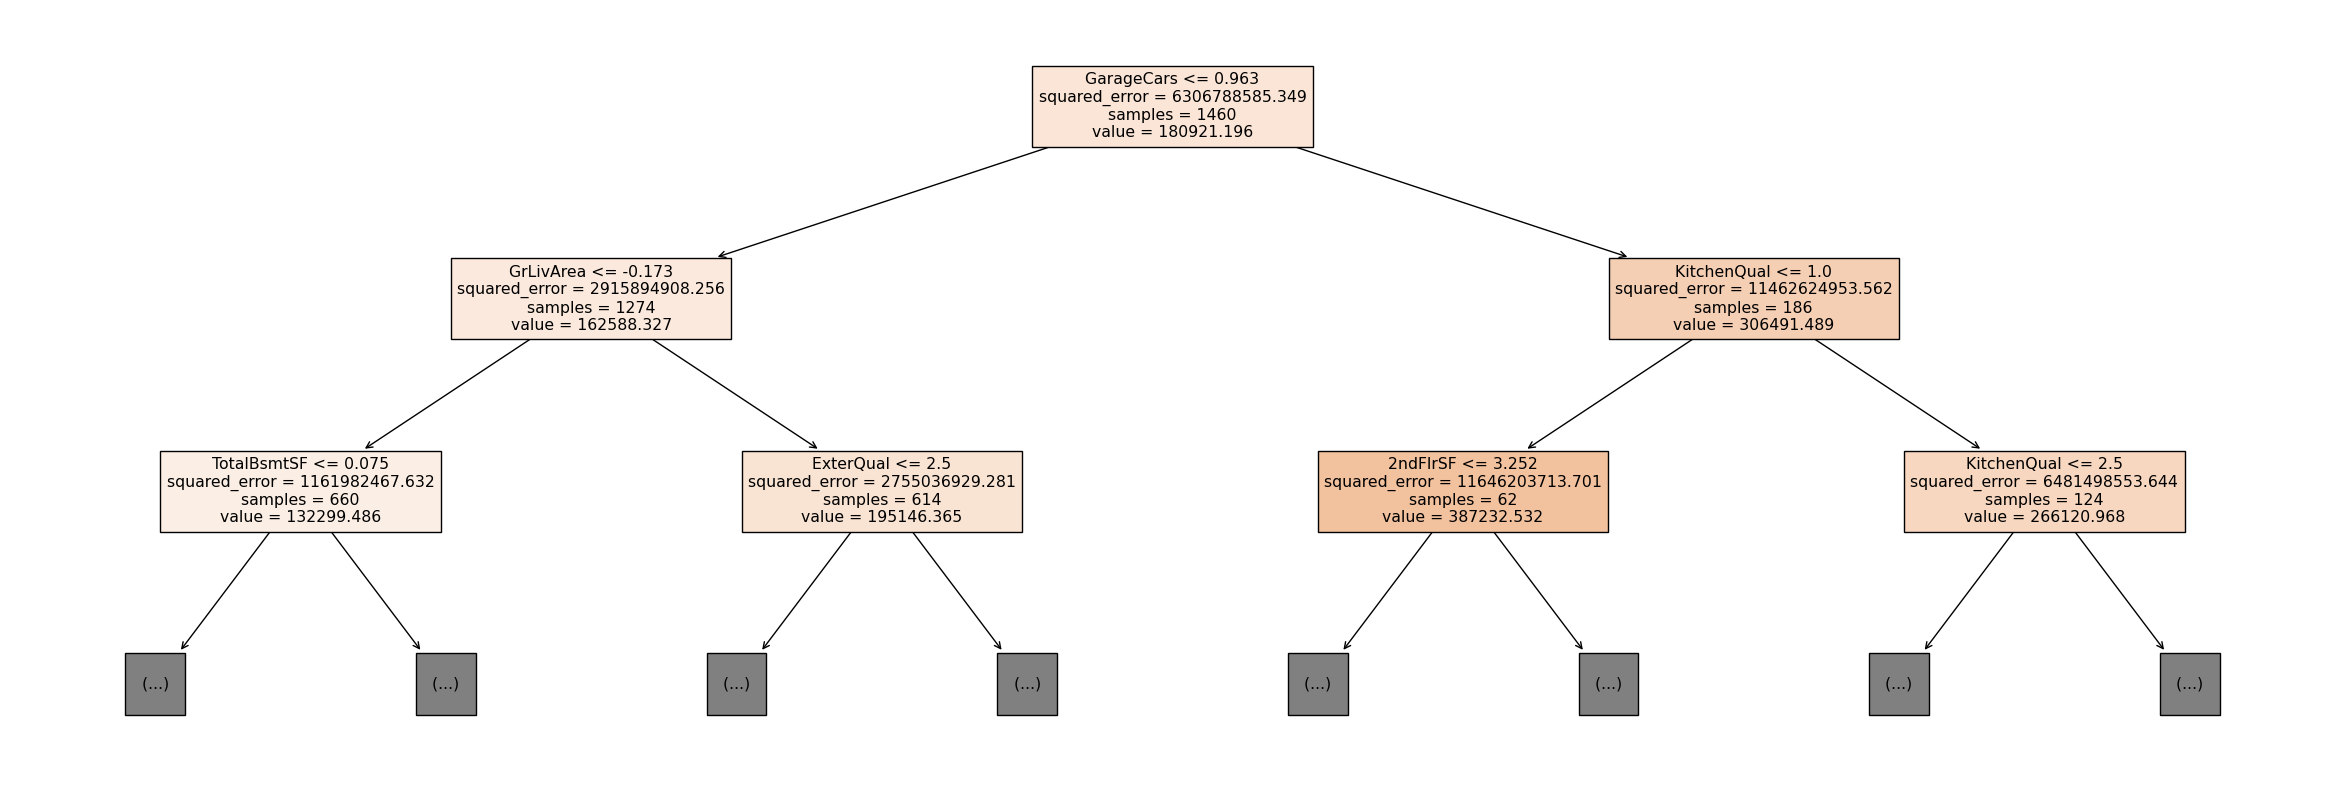

In [257]:
plt.figure(figsize=(30,10))
plot_tree(dr,max_depth=2,feature_names=X_train.columns,filled=True)
plt.show()

In [258]:
sm = pd.read_csv('sample_submission.csv')

In [259]:
lr_sm = sm

In [260]:
lr_sm.SalePrice=model1_pred

In [261]:
lr_sm.to_csv('submissionMlr.csv',index=False)

In [262]:
dr_sm = sm

In [263]:
dr_sm.SalePrice = model2_pred

In [264]:
dr_sm.to_csv('submissionDT.csv',index=False)

In [265]:
from sklearn.ensemble import RandomForestRegressor

In [266]:
RF = RandomForestRegressor(n_estimators=3000)

In [268]:
RFmodel = RF.fit(X_train,y)

C:\Users\Hp\AppData\Local\Temp\ipykernel_26428\3814197395.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFmodel = RF.fit(X_train,y)


In [269]:
RFmodel.score(X_train,y)

0.9796467337617025

In [270]:
cross_val_score(RF,X_train, y)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed whe

array([0.88407886, 0.78640395, 0.85996468, 0.86978156, 0.85810661])

In [271]:
np.mean([0.88407886, 0.78640395, 0.85996468, 0.86978156, 0.85810661])

0.851667132

In [274]:
RFpredict = RFmodel.predict(X_train)

In [277]:
RFpredict

array([208859.23233333, 177899.332     , 220408.97066667, ...,
       260575.70066667, 143987.42933333, 155192.676     ])

In [278]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [279]:
RFresid = np.array(y)-RFpredict

In [280]:
np.sqrt(np.mean(RFresid**2))

108974.6844688573

In [282]:
RF_test_pred = RFmodel.predict(X_test)

In [285]:
RF_test_pred.to_csv('pricepredictionRF.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [284]:
RF_test_pred

array([124398.37366667, 156993.14366667, 185220.27066667, ...,
       144400.637     , 106481.752     , 214691.78466667])